In [2]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = "retina"

# Search for the K2-3 system

In [38]:
search_results = lk.search_lightcurve("K2-3", mission="K2")
search_results

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 01,2014,K2,1800,ktwo201367065,0.0
1,K2 Campaign 01,2014,EVEREST,1800,ktwo201367065,0.0
2,K2 Campaign 01,2014,K2SFF,1800,ktwo201367065,0.0
3,K2 Campaign 01,2014,K2VARCAT,1800,ktwo201367065,0.0


In [39]:
# get the first lightcurve
lc = search_results[1].download()

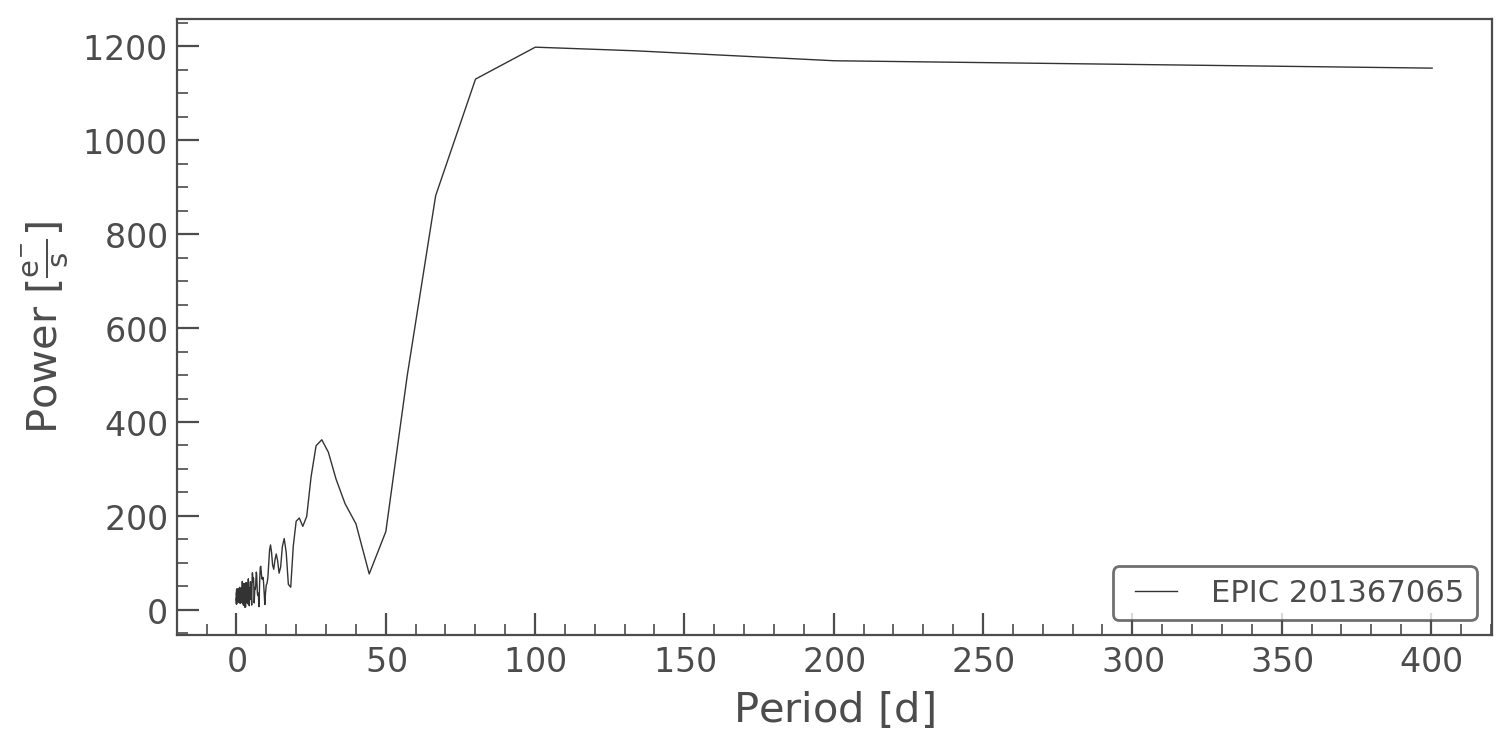

In [40]:
pg = lc.to_periodogram()
pg.plot(view="period")
plt.show()

In [11]:
pg.period_at_max_power

<Quantity 8.61444952 d>

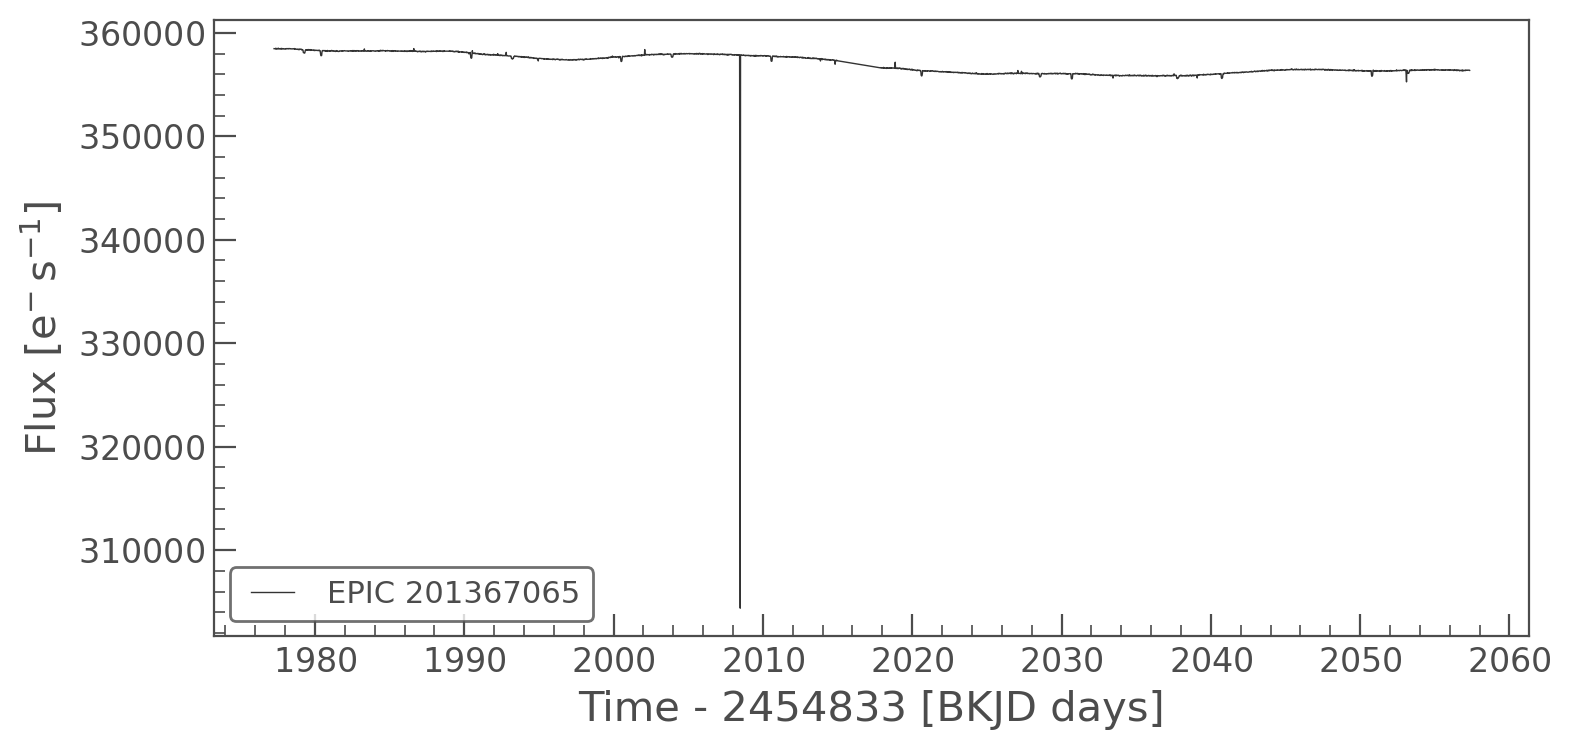

In [41]:
lc.plot();
plt.show()

In [53]:
flat_lc = lc.remove_nans().flatten()

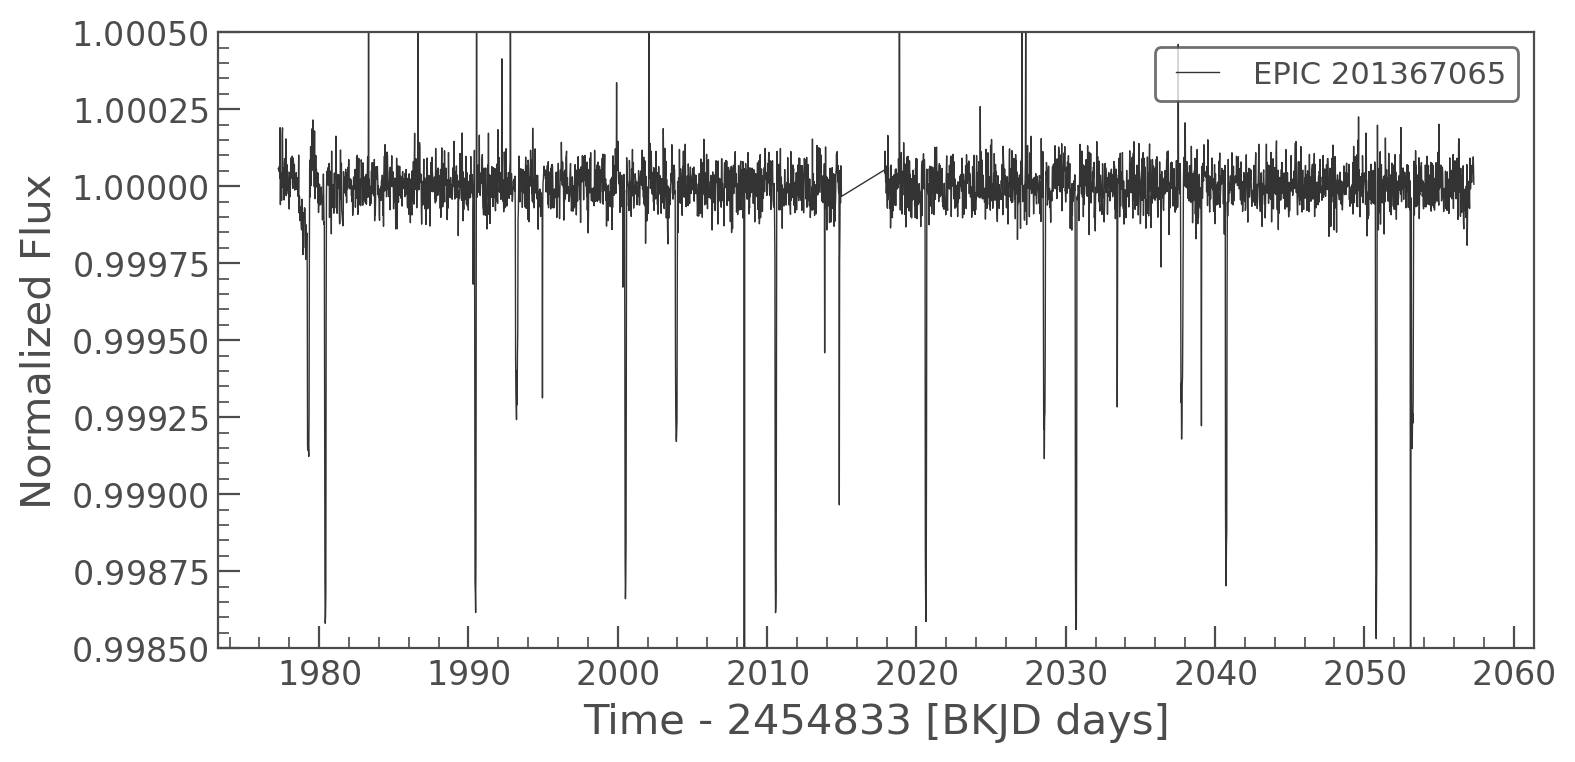

In [54]:
flat_lc.plot(normalize=True)
plt.ylim(bottom=0.9985, top=1.0005)
plt.show()

In [34]:
lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2525.504277339638,———,———,-3.5463616e-03,5607591,1299.64212,400.63099,8.0526318e+03,7.5293022e+01,6.0126426e+04,4.4111732e+01,———,———,1000000000000,———,———,———,———,1299.64212,7.5807809e-03,400.63099,7.5705247e-03,———,———
2525.5045088375473,———,———,-3.5463450e-03,5607592,1299.59817,400.58208,8.0795044e+03,7.5303391e+01,6.0150430e+04,4.4101440e+01,———,———,1000000000000,———,———,———,———,1299.59817,7.5556766e-03,400.58208,7.5476780e-03,———,———
2525.504740335457,———,———,-3.5463285e-03,5607593,1299.63795,400.63285,7.9402397e+03,7.5340446e+01,6.0266785e+04,4.4162529e+01,———,———,1000000000000,———,———,———,———,1299.63795,7.6916162e-03,400.63285,7.6777767e-03,———,———
2525.5049718335995,———,———,-3.5463118e-03,5607594,1299.64133,400.66815,8.0321914e+03,7.5330185e+01,6.0230941e+04,4.4122746e+01,———,———,1000000000000,———,———,———,———,1299.64133,7.6057212e-03,400.66815,7.5955507e-03,———,———
2525.5052033315087,———,———,-3.5462952e-03,5607595,1299.60616,400.59113,8.1255850e+03,7.5424980e+01,6.0317738e+04,4.4178921e+01,———,———,1000000000000,———,———,———,———,1299.60616,7.5235409e-03,400.59113,7.5182598e-03,———,———
2525.505434829418,———,———,-3.5462787e-03,5607596,1299.60756,400.59655,8.1305112e+03,7.5443932e+01,6.0344836e+04,4.4185146e+01,———,———,1000000000000,———,———,———,———,1299.60756,7.5241923e-03,400.59655,7.5159338e-03,———,———
2525.505666327328,———,———,-3.5462622e-03,5607597,1299.62255,400.62166,8.2145166e+03,7.5494072e+01,6.0401586e+04,4.4179596e+01,———,———,1000000000000,———,———,———,———,1299.62255,7.4575031e-03,400.62166,7.4466402e-03,———,———
2525.505897825237,———,———,-3.5462456e-03,5607598,1299.64203,400.63754,7.9876997e+03,7.5469177e+01,6.0488914e+04,4.4217793e+01,———,———,1000000000000,———,———,———,———,1299.64203,7.6603065e-03,400.63754,7.6501309e-03,———,———


In [33]:
len(lc)

102677

In [47]:
fold_lc = flat_lc.fold(10.0546).bin(time_bin_size=0.01)

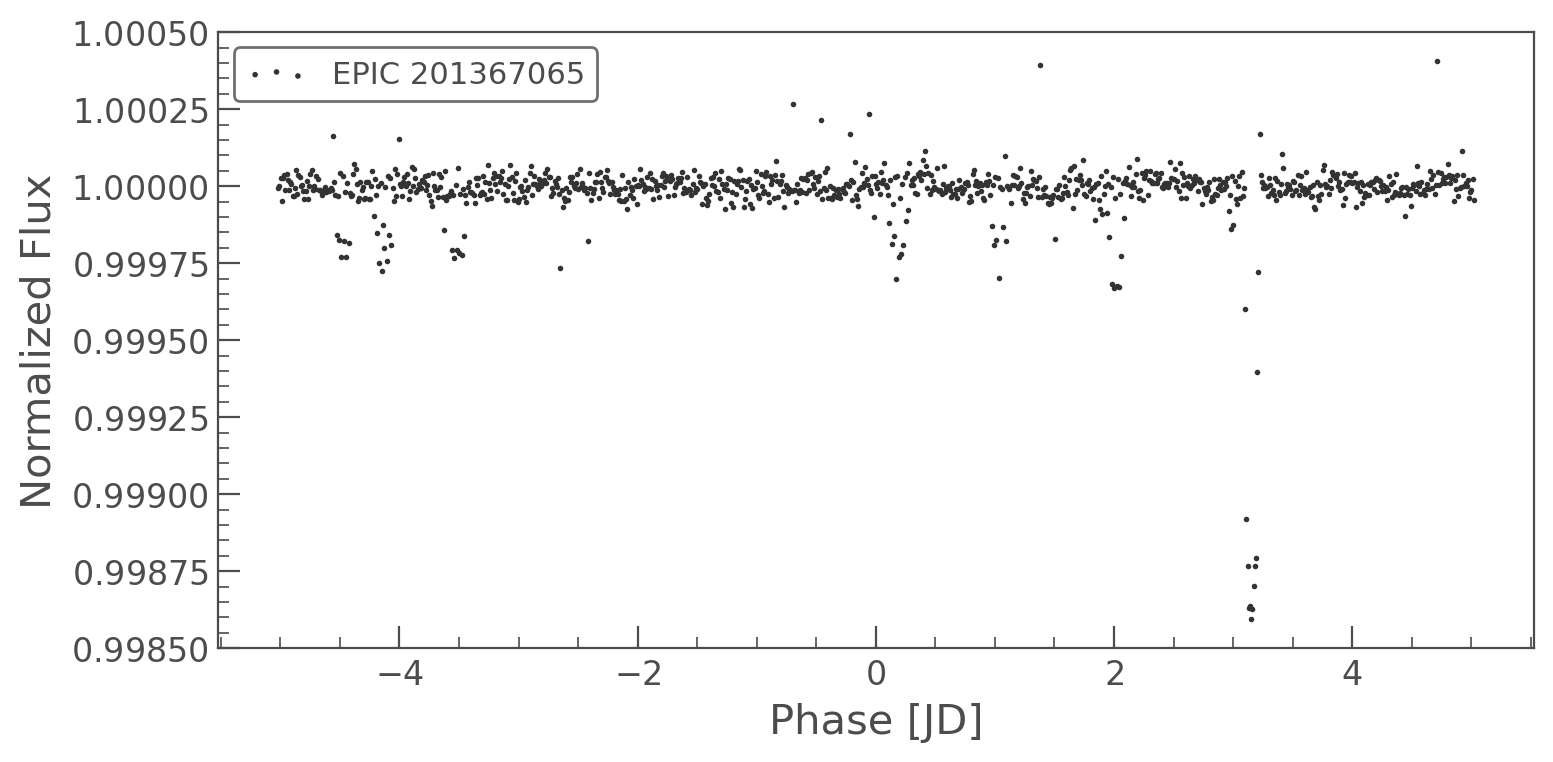

In [51]:
fold_lc.scatter()
plt.ylim(bottom=0.9985, top=1.0005)
plt.show()

In [19]:
tpf = lk.search_tpftargetpixelfile("K2-3", mission="TESS")[0].download()

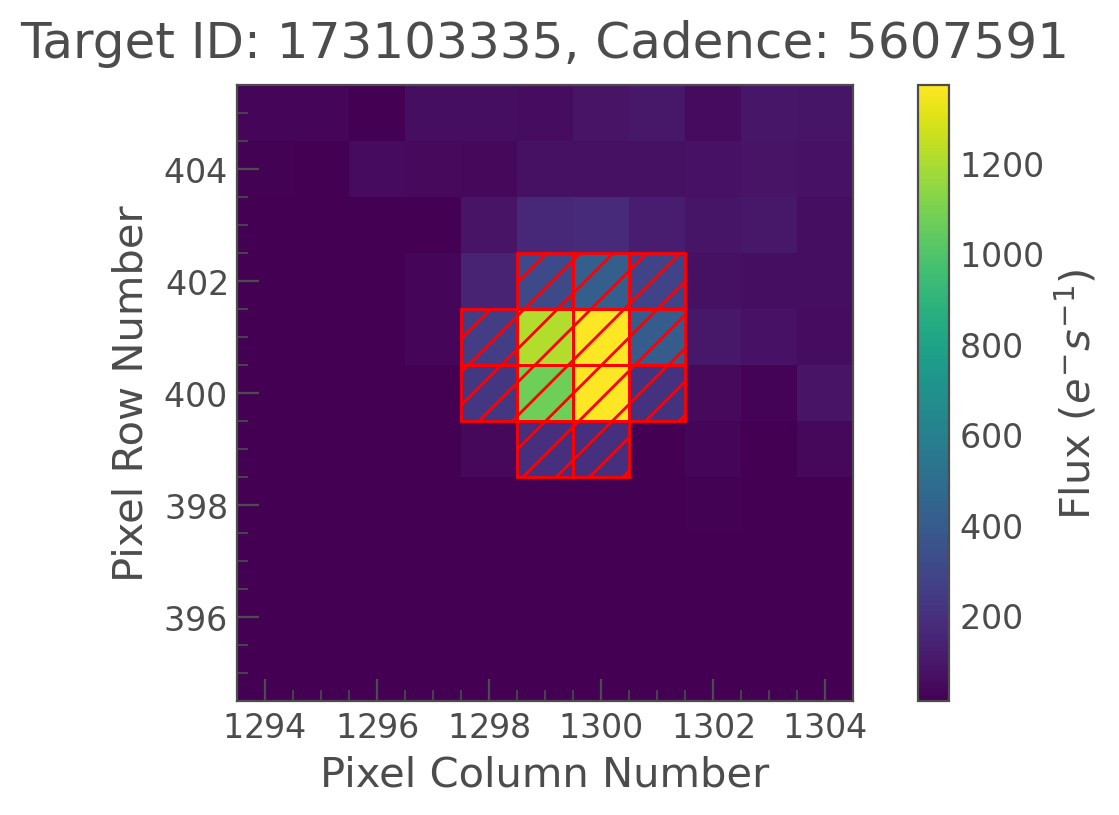

In [23]:
tpf.plot(aperture_mask="pipeline")
plt.show()

In [24]:
from lightkurve.correctors import PLDCorrector
pld = PLDCorrector(tpf)

In [26]:
corrected_lc = pld.correct()

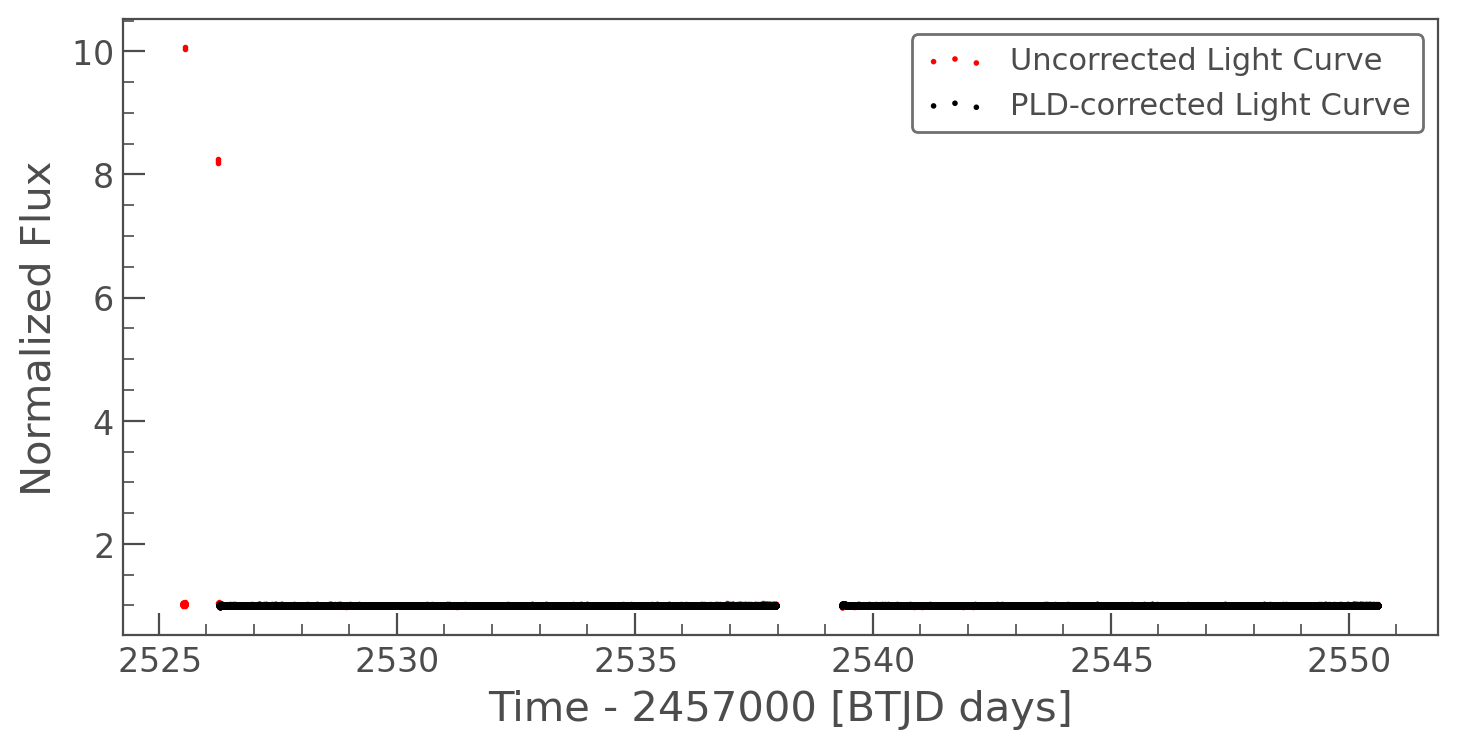

In [27]:
# Create and plot an uncorrected light curve using Simple Aperture Photometry
uncorrected_lc = tpf.to_lightcurve()
ax = uncorrected_lc.normalize().scatter(color='red', label='Uncorrected Light Curve');
# Plot the PLD-corrected light curve in black on top
corrected_lc.normalize().remove_outliers().scatter(ax=ax, color='black', label='PLD-corrected Light Curve');
plt.show()

In [28]:
uncorrected_cdpp = uncorrected_lc.estimate_cdpp()
corrected_cdpp = corrected_lc.estimate_cdpp()
print(f"Uncorrected CDPP = {uncorrected_cdpp:.0f}")
print(f"Corrected CDPP = {corrected_cdpp:.0f}")

Uncorrected CDPP = 897 ppm
Corrected CDPP = 966 ppm


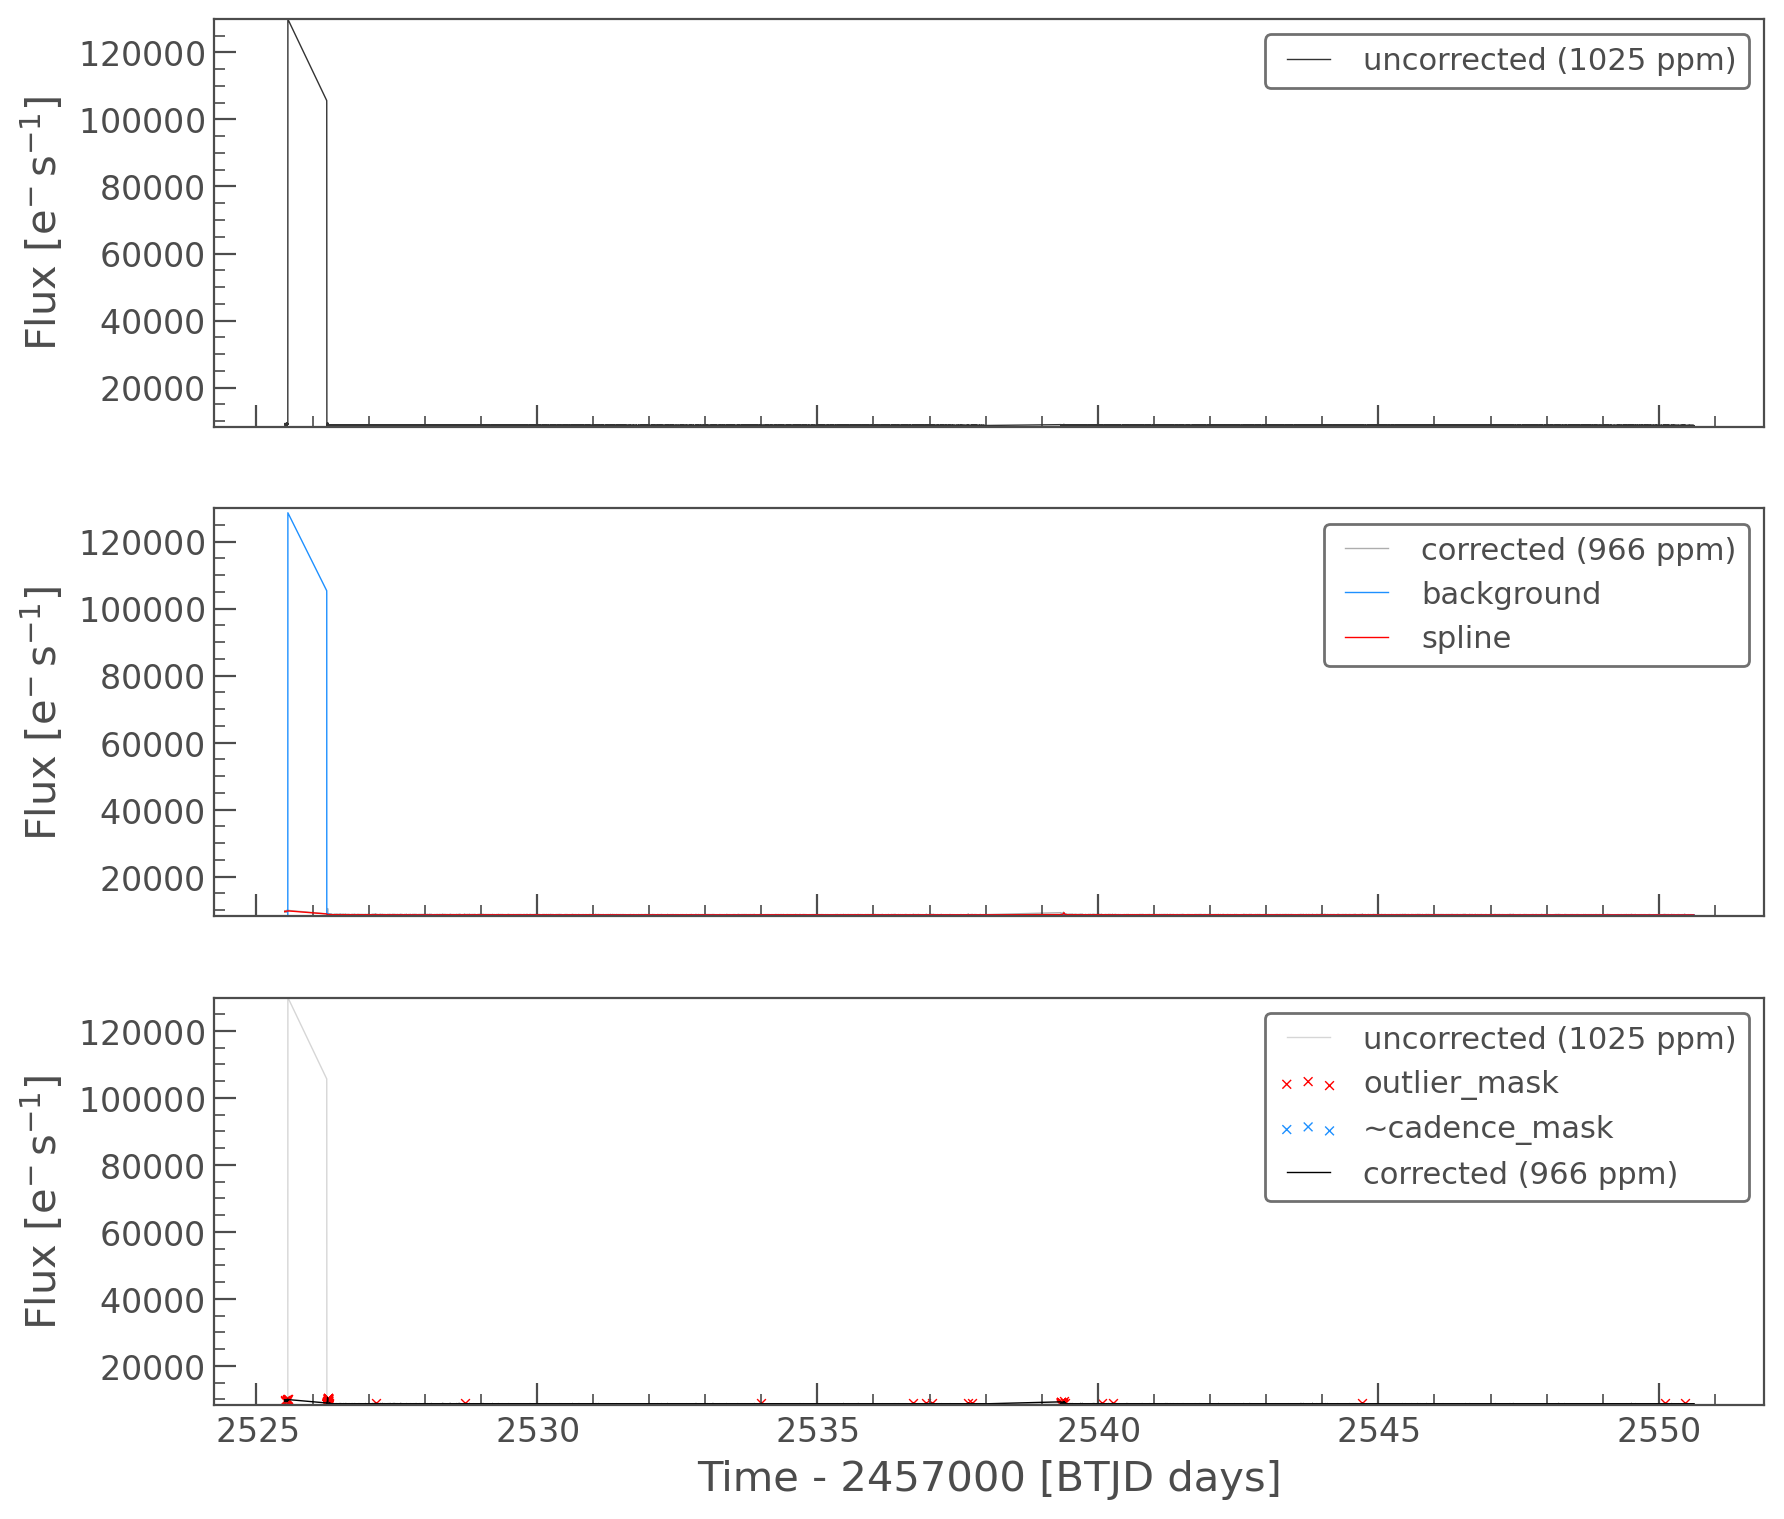

In [31]:
pld.diagnose();
plt.show()